In [1]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization


#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline

import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
df =  pd.read_csv("D:/JAINAM/nifty_23_Anomaly.csv", index_col='Date', parse_dates=True) 
df

,Close
Date,
1999-01-01,890.80
1999-01-04,897.80
1999-01-05,907.20
1999-01-06,928.25
1999-01-07,954.70
...,...
2023-01-02,18197.45
2023-01-03,18232.55
2023-01-04,18042.95


In [3]:
df.dropna(axis=1,inplace=True)
df

,Close
Date,
1999-01-01,890.80
1999-01-04,897.80
1999-01-05,907.20
1999-01-06,928.25
1999-01-07,954.70
...,...
2023-01-02,18197.45
2023-01-03,18232.55
2023-01-04,18042.95


<AxesSubplot:xlabel='Date'>

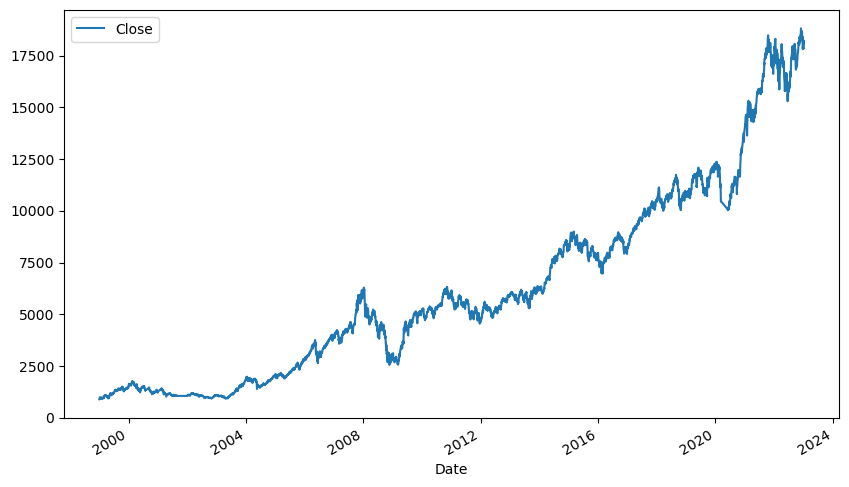

In [4]:
df.plot()

(array([1608.,  642., 1329.,  355.,  509.,  590.,  184.,  108.,  163.,
         244.]),
 array([  890.8 ,  2682.97,  4475.14,  6267.31,  8059.48,  9851.65,
        11643.82, 13435.99, 15228.16, 17020.33, 18812.5 ]),
 <BarContainer object of 10 artists>)

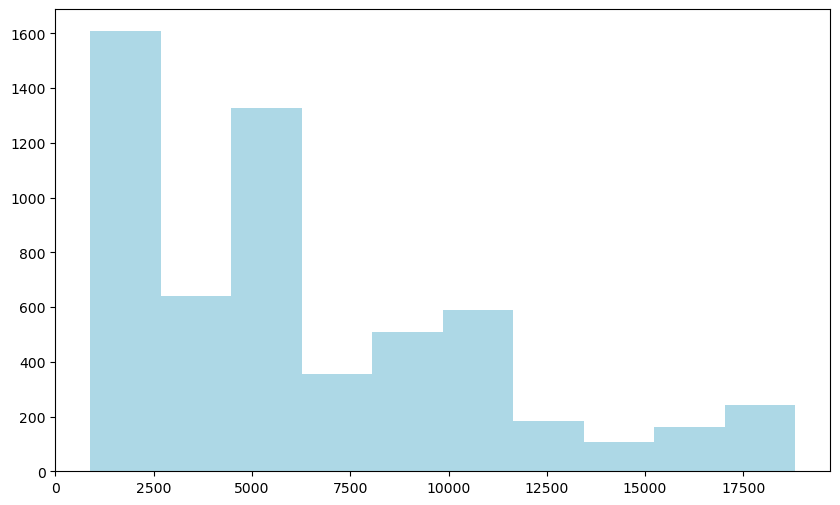

In [5]:
plt.hist(df["Close"],color="lightblue")

#Looking at the above results the mean and variance of the first part is very different from the second part.
#It shows another indication of non-stationary time series data. Var is almost same but mean is far from each other.

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
test_result=adfuller(df)

In [8]:
def ad_test(dataset):
    datatest = adfuller(dataset, autolag = 'AIC')

    print("1. Test Statistics : ",datatest[0])
    print("2. P-Value : ",datatest[1])
    print("3. No of Lags : ",datatest[2])
    print("4. No of Obseravation used : ",datatest[3])
    print("5. Critical Value : ")
    for key, val in datatest[4].items():
        print("\t",key,":", val)
#P-value should be less than 0.05 or data will be considered as non stationary and we will need to run tests.

In [9]:
ad_test(df['Close'])
if test_result[1] <= 0.05:
    print("Strong Evidence against the null hypothesis, Data is Non-stationary.")
else:
    print("Weak Evidence against the null hypothesis, Data is Stationary.")

1. Test Statistics :  1.278968213315427
2. P-Value :  0.996488541811018
3. No of Lags :  34
4. No of Obseravation used :  5697
5. Critical Value : 
	 1% : -3.4314983673706285
	 5% : -2.8620474678658687
	 10% : -2.5670401234099574
Weak Evidence against the null hypothesis, Data is Stationary.


#From the above result, we observe ADF statistic is greater than critical values. So we can say that
Time series is non-stationary.

In [10]:
df['Price First Difference'] = df['Close']-df['Close'].shift(1)

In [11]:
df['Close'].shift(1)

Date
1999-01-01         NaN
1999-01-04      890.80
1999-01-05      897.80
1999-01-06      907.20
1999-01-07      928.25
                ...   
2023-01-02    18105.30
2023-01-03    18197.45
2023-01-04    18232.55
2023-01-05    18042.95
2023-01-06    17992.15
Name: Close, Length: 5732, dtype: float64

In [12]:
df['Seasonal First Difference']=df['Close']-df['Close'].shift(12)

In [13]:
df.head(20)

,Close,Price First Difference,Seasonal First Difference
Date,,,
1999-01-01,890.80,NaN,NaN
1999-01-04,897.80,7.00,NaN
1999-01-05,907.20,9.40,NaN
1999-01-06,928.25,21.05,NaN
1999-01-07,954.70,26.45,NaN
1999-01-08,990.05,35.35,NaN
1999-01-11,985.60,-4.45,NaN
1999-01-12,964.45,-21.15,NaN
1999-01-13,961.20,-3.25,NaN


In [14]:
ad_test(df['Seasonal First Difference'].dropna())

1. Test Statistics :  -13.615896377825539
2. P-Value :  1.8354279752133984e-25
3. No of Lags :  34
4. No of Obseravation used :  5685
5. Critical Value : 
	 1% : -3.431500792460908
	 5% : -2.8620485393150084
	 10% : -2.5670406937743713


<AxesSubplot:xlabel='Date'>

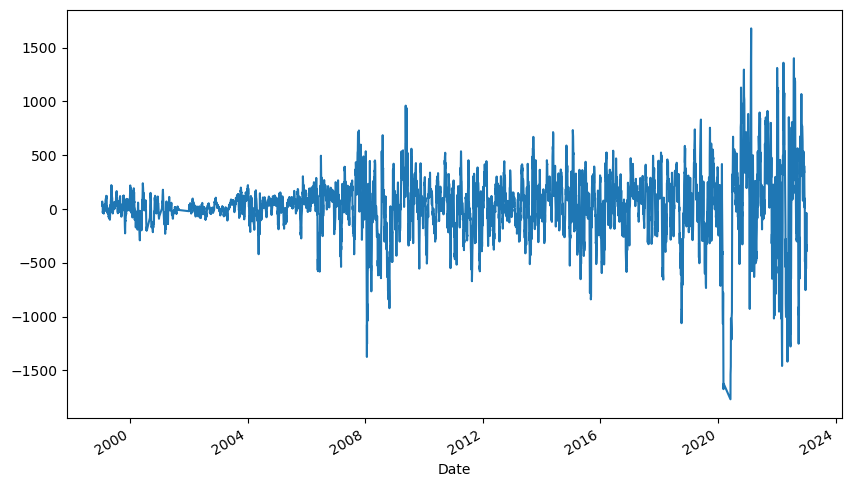

In [15]:
df['Seasonal First Difference'].plot()

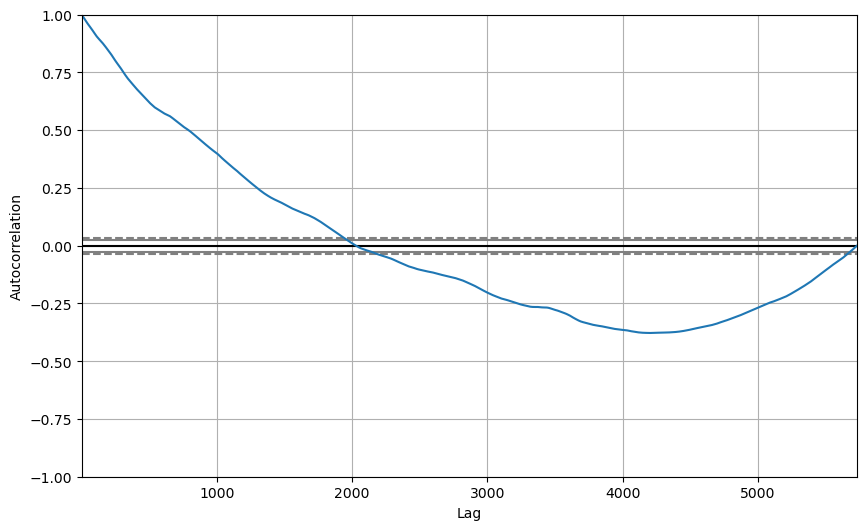

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])
plt.show()

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

C:\Users\alish\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


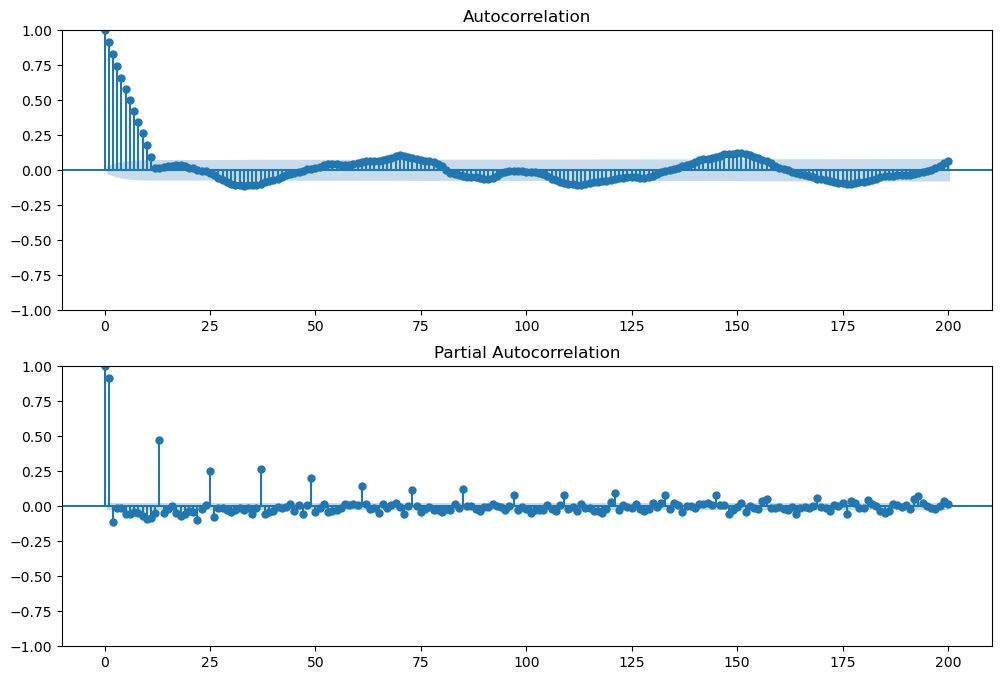

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=200,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=200,ax=ax2)

<AxesSubplot:xlabel='Date'>

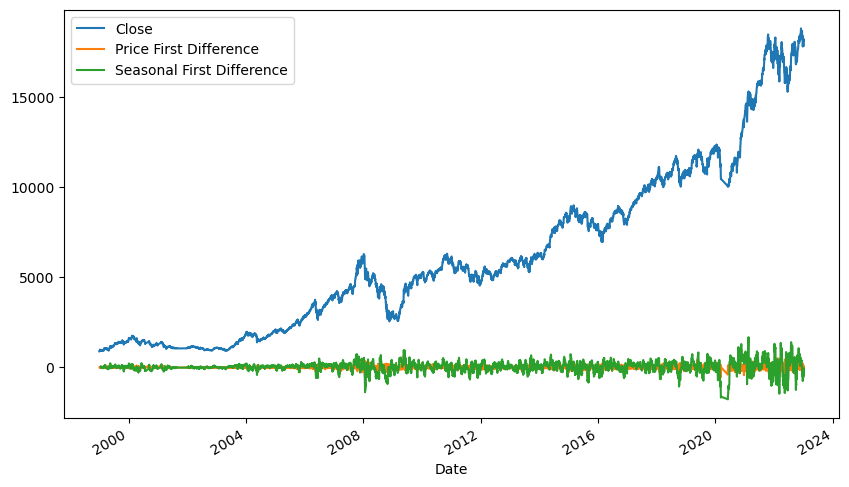

In [19]:
df.plot()

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
print(df.shape)
train=df.iloc[:-50]
test=df.iloc[-50:]
print(train.shape, test.shape)

(5732, 3)
(5682, 3) (50, 3)


In [29]:
model=ARIMA(train['Close'], order=(0,0,0), seasonal_order=(0,1,0,12))
model=model.fit()
model.summary()

C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 5682
Model:             ARIMA(0, 1, 0, 12)   Log Likelihood              -40137.921
Date:                Wed, 11 Jan 2023   AIC                          80277.843
Time:                        12:11:00   BIC                          80284.486
Sample:                             0   HQIC                         80280.156
                               - 5682                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.229e+04    870.412     94.541      0.000    8.06e+04     8.4e+04
===================================================================================
Ljung-Box (L1) (Q):                4791.96   Jarque-Bera (JB):              5141.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              14.10   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2022-10-28    17241.00
2022-10-31    16983.55
2022-11-01    17123.60
2022-11-02    17014.35
2022-11-03    17185.70
2022-11-04    17311.80
2022-11-07    17486.95
2022-11-09    17512.25
2022-11-10    17563.95
2022-11-11    17576.30
2022-11-14    17656.35
2022-11-15    17736.95
2022-11-16    17241.00
2022-11-17    16983.55
2022-11-18    17123.60
2022-11-21    17014.35
2022-11-22    17185.70
2022-11-23    17311.80
2022-11-24    17486.95
2022-11-25    17512.25
2022-11-28    17563.95
2022-11-29    17576.30
2022-11-30    17656.35
2022-12-01    17736.95
2022-12-02    17241.00
2022-12-05    16983.55
2022-12-06    17123.60
2022-12-07    17014.35
2022-12-08    17185.70
2022-12-09    17311.80
2022-12-12    17486.95
2022-12-13    17512.25
2022-12-14    17563.95
2022-12-15    17576.30
2022-12-16    17656.35
2022-12-19    17736.95
2022-12-20    17241.00
2022-12-21    16983.55
2022-12-22    17123.60
2022-12-23    17014.35
2022-12-26    17185.70
2022-12-27    17311.80
2022-12-28    17486.95
2022-1

C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Close']))
print(rmse)

992.3946643095179


<AxesSubplot:xlabel='Date'>

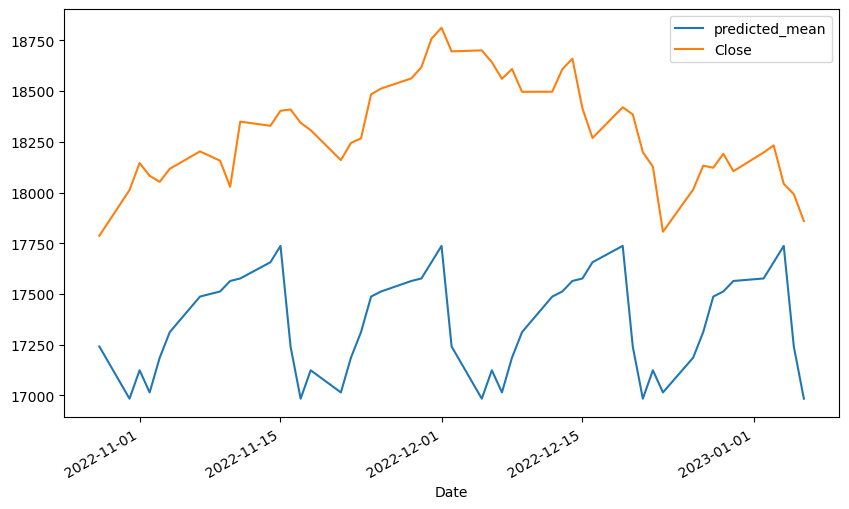

In [32]:
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [33]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [34]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [35]:
pred=model2.predict(start=len(df),end=len(df)+30,type='levels').rename('ARIMA Predictions')
print(pred)

5732    18127.35
5733    17806.80
5734    18014.60
5735    18132.30
5736    18122.50
5737    18191.00
5738    18105.30
5739    18197.45
5740    18232.55
5741    18042.95
5742    17992.15
5743    17859.45
5744    18127.35
5745    17806.80
5746    18014.60
5747    18132.30
5748    18122.50
5749    18191.00
5750    18105.30
5751    18197.45
5752    18232.55
5753    18042.95
5754    17992.15
5755    17859.45
5756    18127.35
5757    17806.80
5758    18014.60
5759    18132.30
5760    18122.50
5761    18191.00
5762    18105.30
Name: ARIMA Predictions, dtype: float64


C:\Users\alish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
